<a href="https://colab.research.google.com/github/CienciaDatosUdea/002_EstudiantesAprendizajeEstadistico/blob/main/semestre2024-2/Laboratorios/Laboratorio_01_pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>




# Laboratorio 1.0: 

## Series de tiempo

El siguiente [dataset](https://raw.githubusercontent.com/hernansalinas/Curso_aprendizaje_estadistico/main/datasets/Pandas_data_historical_dataEURUSD.csv) contiene información del precio del eur/usd  desde el 05/07/2022/ hasta el 12/05/2023 con periodicidad de una hora. El data frame contiene el precio de apertura, cierrre, valor más bajo cotizado, valor más alto cotizado, volumen, spread etc. Para este dataset, realizar lo siguiente:


1. Leer el dataset desde el github.
2. Definir como indice la columna time.
3. Obtenga información del data frame.

4. Determine si hay null, nan en el data frame.

5. Emplea la notacion Pascal Case y trabaja solo con la columa del precio de cierre del eur/usd.  

6. Ahora vamos a determinar cual es la mejor distribución estadística que se ajusta a la diferencia del precio de cierre cada hora, para ello realizamos lo siguiente:
- Determine la diferencia de precio entre horas, agregue una nueva columna llamada DiffPrice, en este punto tu dataframe debe tener solo dos columnas Close, DiffPrice y el indice debe ser el tiempo.
- Para la nueva columna construya un histograma de los datos.
- Determine la mejor distribucion estadística que se ajusta al histograma anterior, para ello puede emplear lo siguente:


https://pypi.org/project/fitter/

```python


from fitter import Fitter, get_common_distributions, get_distributions

f = Fitter(data,
           distributions=['gamma',
                          'lognorm',
                          "beta",
                          "burr",
                          "norm"])
f.fit()
f.summary()
#Indentificamos la mejor distribucion con el error cuadratico medio
f.get_best(method = 'sumsquare_error')
#Indentificamos parametros de la distrubicion beta
f.fitted_param["beta"]

```

Con el metodo get_distributions(), podemos ver todas las distribuciones estadisticas de la libreria. Ajusta a la mejor.  Puede consultar [esta](https://medium.com/the-researchers-guide/finding-the-best-distribution-that-fits-your-data-using-pythons-fitter-library-319a5a0972e9)  página si desea ver un ejemplo.


7. Para el data frame, seleccionemos solo los datos del 2023.

8. El comando groupby permite agrupar los datos con la periodicidad deseada: 1 dias, 2 dias, 1 mes etc. Determina el promedio con una periodicidad de 15 dias, con periodidicidad de 1 semana, y una periodicidad de 1 mes

```python
  df.groupby(pd.Grouper(key='time', freq='15D')).mean()
```

9. Para los datos asociados a los meses de 2023, construya un histograma para cada mes.  Para ello puedo emplear el metodo groupby. Notetese que si no  realiza una operación después de aplicar el metodo grouby, podrias iterar sobre dicho objeto, por ejemplo:

```python
q=df.groupby(pd.Grouper(key='time', freq='15D'))

for name, group in q:
  print(name, group)
```


In [1]:
# Importar librerias

import pandas as pd
import numpy
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# 1. Leer el dataset desde el github.

path = "https://raw.githubusercontent.com/hernansalinas/Curso_aprendizaje_estadistico/main/datasets/Pandas_data_historical_dataEURUSD.csv"

df = pd.read_csv(path)

In [3]:
# 2. Definir como indice la columna time.

df.index = pd.to_datetime(df.time)
df = df.drop(columns = ['Unnamed: 0','time'])

In [4]:
# 3. Obtenga información del data frame.

df.describe()

,open,high,low,close,tick_volume,spread,real_volume,MeanCloseOpen,Diff_Close,Diff_Open,Diff_MeanCloseOpen
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.0,5000.000000,5000.000000,5000.000000,5000.000000
mean,1.043891,1.044815,1.042991,1.043906,3690.249400,8.981600,0.0,1.043898,0.000012,0.000012,0.000012
std,0.041135,0.040991,0.041263,0.041135,2800.488505,5.785115,0.0,0.041129,0.001400,0.001404,0.000978
min,0.953910,0.955930,0.953570,0.953910,85.000000,0.000000,0.0,0.954735,-0.013970,-0.014010,-0.007260
25%,1.002718,1.003507,1.001715,1.002705,1738.750000,8.000000,0.0,1.002648,-0.000580,-0.000600,-0.000425
50%,1.055670,1.056795,1.054960,1.055700,2999.500000,8.000000,0.0,1.055712,-0.000005,0.000000,0.000005
75%,1.078940,1.079582,1.078222,1.078947,4861.000000,8.000000,0.0,1.078955,0.000620,0.000612,0.000430
max,1.108470,1.109530,1.108050,1.108500,23708.000000,183.000000,0.0,1.108280,0.017340,0.017420,0.010780


In [5]:
# 4. Determine si hay null, nan en el data frame.

df.isna().sum()

open                  0
high                  0
low                   0
close                 0
tick_volume           0
spread                0
real_volume           0
MeanCloseOpen         0
Diff_Close            0
Diff_Open             0
Diff_MeanCloseOpen    0
dtype: int64

In [6]:
# 5. Emplea la notacion Pascal Case y trabaja solo con la columa del precio de cierre del eur/usd. 

df.columns = ['Open', 'High', 'Low', 'Close', 'TickVolume', 'Spread', 'RealVolume', 'MeanCloseOpen', 'DiffClose', 'DiffOpen', 'DiffMeanCloseOpen']

df.head()

,Open,High,Low,Close,TickVolume,Spread,RealVolume,MeanCloseOpen,DiffClose,DiffOpen,DiffMeanCloseOpen
time,,,,,,,,,,,
2022-07-25 13:00:00,1.02427,1.02430,1.02145,1.02345,3927,8,0,1.023860,-0.00046,-0.00082,-0.000640
2022-07-25 14:00:00,1.02345,1.02578,1.02288,1.02299,5344,8,0,1.023220,-0.00046,-0.00082,-0.000640
2022-07-25 15:00:00,1.02303,1.02476,1.02230,1.02457,5524,8,0,1.023800,0.00158,-0.00042,0.000580
2022-07-25 16:00:00,1.02454,1.02548,1.02355,1.02485,5234,8,0,1.024695,0.00028,0.00151,0.000895
2022-07-25 17:00:00,1.02485,1.02514,1.02030,1.02181,9031,7,0,1.023330,-0.00304,0.00031,-0.001365


In [7]:
# Columna del precio de cierre del eur/usd.

df_close = df['Close']
df_close = pd.DataFrame(df_close) # Convertir a DataFrame
df_close.head()

,Close
time,
2022-07-25 13:00:00,1.02345
2022-07-25 14:00:00,1.02299
2022-07-25 15:00:00,1.02457
2022-07-25 16:00:00,1.02485
2022-07-25 17:00:00,1.02181


In [8]:
# 6. Ahora vamos a determinar cual es la mejor distribución estadística que se ajusta a la diferencia del precio de 
# cierre cada hora, para ello realizamos lo siguiente:
# - Determine la diferencia de precio entre horas, agregue una nueva columna llamada DiffPrice, en este punto tu 
# dataframe debe tener solo dos columnas Close, DiffPrice y el indice debe ser el tiempo.

df_close['DiffPrice'] = df_close.diff()
df_close.fillna(0, inplace = True)  # Rellenar el primer valor de DiffPrice con 0
df_close.head()

,Close,DiffPrice
time,,
2022-07-25 13:00:00,1.02345,0.00000
2022-07-25 14:00:00,1.02299,-0.00046
2022-07-25 15:00:00,1.02457,0.00158
2022-07-25 16:00:00,1.02485,0.00028
2022-07-25 17:00:00,1.02181,-0.00304


<Axes: xlabel='DiffPrice', ylabel='Count'>

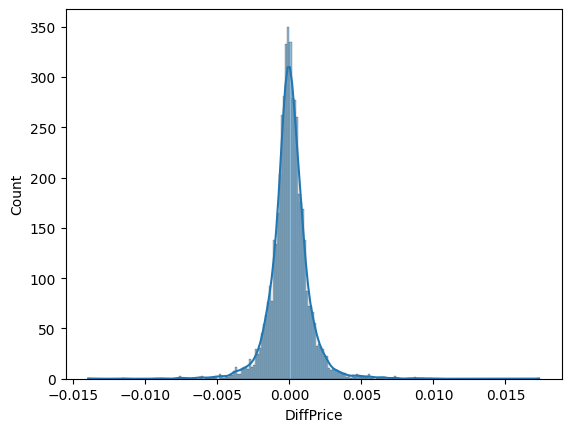

In [9]:
# - Para la nueva columna construya un histograma de los datos.

sns.histplot(df_close['DiffPrice'], kde = True)

(9629.236781777083, 19249.08933491932, -0.1683919325457629, 0.5050441923223208)

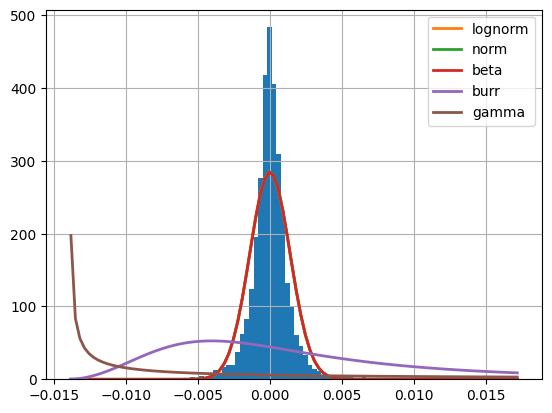

In [10]:
# - Determine la mejor distribucion estadística que se ajusta al histograma anterior

from fitter import Fitter, get_common_distributions, get_distributions

f = Fitter(df_close['DiffPrice'],
           distributions=['gamma',
                          'lognorm',
                          "beta",
                          "burr",
                          "norm"])
f.fit()
f.summary()
#Indentificamos la mejor distribucion con el error cuadratico medio
f.get_best(method = 'sumsquare_error')
#Indentificamos parametros de la distrubicion beta
f.fitted_param["beta"]

(1.2298000000000008e-05, 0.0014003393514416419)

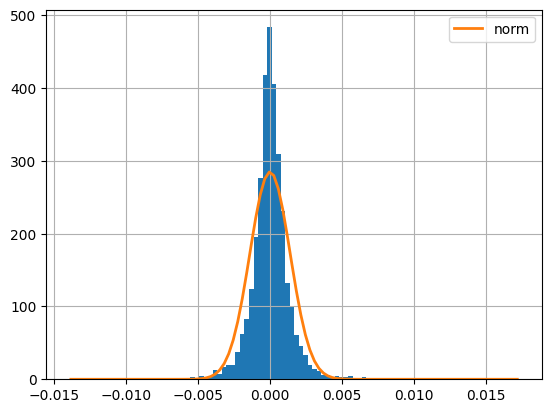

In [11]:
# La distribucion estadística que se ajusta mejor al histograma

f = Fitter(df_close['DiffPrice'],
           distributions=["norm"])
f.fit()
f.summary()
#Indentificamos la mejor distribucion con el error cuadratico medio
f.get_best(method = 'sumsquare_error')
#Indentificamos parametros de la distrubicion beta
f.fitted_param["norm"]

In [12]:
# 7. Para el data frame, seleccionemos solo los datos del 2023.

df_2023 = df[df.index.year == 2023]
df_2023.head()

,Open,High,Low,Close,TickVolume,Spread,RealVolume,MeanCloseOpen,DiffClose,DiffOpen,DiffMeanCloseOpen
time,,,,,,,,,,,
2023-01-02 00:00:00,1.06998,1.07061,1.06795,1.06796,98,57,0,1.068970,-0.00200,-0.00063,-0.001315
2023-01-02 01:00:00,1.06847,1.06965,1.06847,1.06965,91,183,0,1.069060,0.00169,-0.00151,0.000090
2023-01-02 02:00:00,1.06965,1.07060,1.06904,1.07058,325,11,0,1.070115,0.00093,0.00118,0.001055
2023-01-02 03:00:00,1.07058,1.07075,1.06837,1.06896,271,26,0,1.069770,-0.00162,0.00093,-0.000345
2023-01-02 04:00:00,1.06895,1.06896,1.06799,1.06880,137,78,0,1.068875,-0.00016,-0.00163,-0.000895


In [15]:
# 8. El comando groupby permite agrupar los datos con la periodicidad deseada: 1 dias, 2 dias, 1 mes etc. 
# Determina el promedio con una periodicidad de 15 dias, con periodidicidad de 1 semana, y una periodicidad de 1 mes

# - Promedio con una periodicidad de 15 dias
df_15d = df_2023.groupby(pd.Grouper(freq='15D')).mean()
df_15d.head()

,Open,High,Low,Close,TickVolume,Spread,RealVolume,MeanCloseOpen,DiffClose,DiffOpen,DiffMeanCloseOpen
time,,,,,,,,,,,
2023-01-02,1.069313,1.070248,1.068430,1.069361,3503.856061,10.181818,0.0,1.069337,0.000047,0.000043,0.000045
2023-01-17,1.085552,1.086401,1.084746,1.085565,3191.670455,8.973485,0.0,1.085558,0.000015,0.000020,0.000017
2023-02-01,1.077734,1.078544,1.076861,1.077679,3179.253788,8.863636,0.0,1.077707,-0.000066,-0.000069,-0.000068
2023-02-16,1.063187,1.063884,1.062480,1.063150,2926.143939,8.833333,0.0,1.063169,-0.000034,-0.000034,-0.000034
2023-03-03,1.063175,1.064041,1.062303,1.063186,3618.418251,8.904943,0.0,1.063181,0.000026,0.000023,0.000024


In [16]:
# - Promedio con una periodicidad de 1 semana
df_1w = df_2023.groupby(pd.Grouper(freq='1W')).mean()
df_1w.head()

,Open,High,Low,Close,TickVolume,Spread,RealVolume,MeanCloseOpen,DiffClose,DiffOpen,DiffMeanCloseOpen
time,,,,,,,,,,,
2023-01-08,1.060026,1.060999,1.059065,1.059972,3606.366667,11.341667,0.0,1.059999,-0.000047,-0.000050,-0.000049
2023-01-15,1.075837,1.076790,1.074993,1.076002,3643.375000,9.141667,0.0,1.075920,0.000156,0.000156,0.000156
2023-01-22,1.082021,1.082941,1.081192,1.082041,3450.716667,9.091667,0.0,1.082031,0.000020,0.000020,0.000020
2023-01-29,1.088411,1.089192,1.087631,1.088414,2863.625000,8.941667,0.0,1.088412,0.000010,0.000007,0.000009
2023-02-05,1.089315,1.090211,1.088410,1.089281,3306.150000,8.900000,0.0,1.089298,-0.000062,-0.000060,-0.000061


In [17]:
# - Promedio con una periodicidad de 1 mes
df_1m = df_2023.groupby(pd.Grouper(freq='1M')).mean()
df_1m.head()

C:\Users\Acer\AppData\Local\Temp\ipykernel_27636\67970542.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_1m = df_2023.groupby(pd.Grouper(freq='1M')).mean()


,Open,High,Low,Close,TickVolume,Spread,RealVolume,MeanCloseOpen,DiffClose,DiffOpen,DiffMeanCloseOpen
time,,,,,,,,,,,
2023-01-31,1.077433,1.078325,1.076588,1.077463,3347.763258,9.577652,0.0,1.077448,0.000031,0.000031,0.000031
2023-02-28,1.071221,1.071972,1.070433,1.071167,3029.912500,8.825000,0.0,1.071194,-0.000060,-0.000062,-0.000061
2023-03-31,1.070837,1.071657,1.070032,1.070874,3282.461818,8.901818,0.0,1.070855,0.000049,0.000049,0.000049
2023-04-30,1.096012,1.096711,1.095365,1.096051,2208.629167,8.854167,0.0,1.096032,0.000036,0.000036,0.000036
2023-05-31,1.099051,1.099718,1.098358,1.098980,2240.137500,8.704167,0.0,1.099015,-0.000069,-0.000070,-0.000069


C:\Users\Acer\AppData\Local\Temp\ipykernel_27636\2520468846.py:7: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  q = df_2023.groupby(pd.Grouper(freq='1M'))


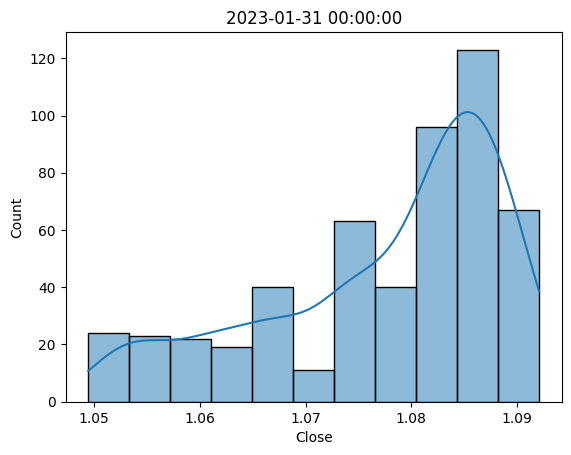

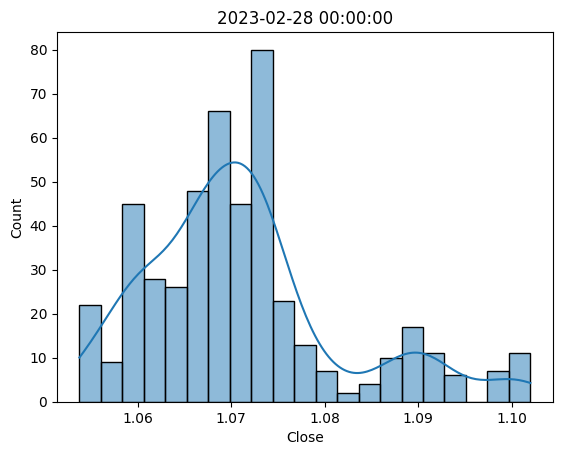

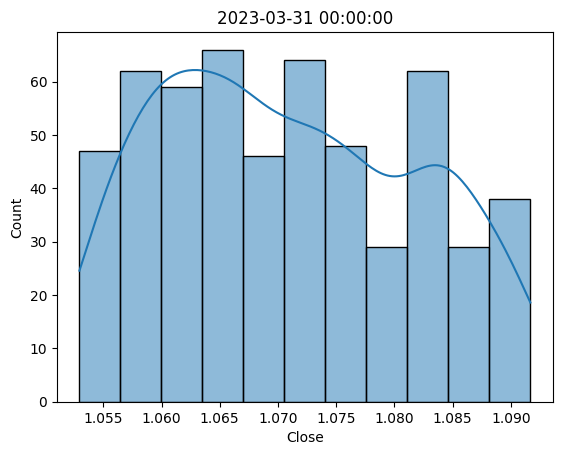

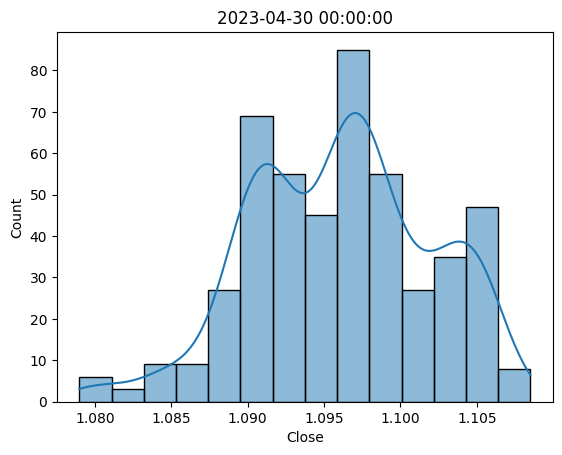

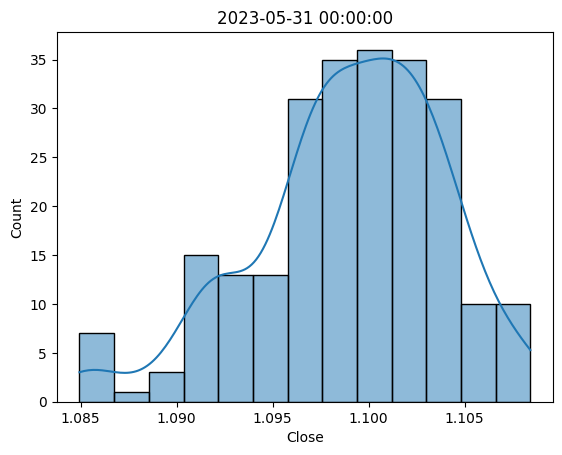

In [19]:
# 9. Para los datos asociados a los meses de 2023, construya un histograma para cada mes.  Para ello puedo emplear 
# el metodo groupby. Notetese que si no  realiza una operación después de aplicar el metodo grouby, podrias iterar 
# sobre dicho objeto, por ejemplo:

# Histograma para cada mes

q = df_2023.groupby(pd.Grouper(freq='1M'))

for name, group in q:

    sns.histplot(group['Close'], kde = True)
    plt.title(name)
    plt.show()

## Análisis de datos con pandas. 

Para el siguiente [dataset](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29) realizar lo siguiente:


1. Leer los datos desde una página web.

2. Renombrar las columnas en formato PascalCase.

3. Utilizar los métodos `head()`, `tail()`, `describe()` e `info()` para obtener información sobre el `DataFrame`.

4. Contabilizar la cantidad de valores nulos (`null` o `NaN`) en el `DataFrame`.
   Si se encuentran valores nulos, ¿qué estrategia propondrías para reemplazarlos?

5. Identificar los valores únicos en la columna `target` que representan las etiquetas B y M (Benigno y Maligno, respectivamente).
   Utiliza el método `unique()` para mostrar estos valores.

6. Realizar un conteo de los casos etiquetados como B y M utilizando la librería `seaborn` y el método `countplot()`:

```python
import seaborn as sns
sns.countplot?
```

7. Agregar una nueva columna llamada `DiagnosisNumeric` donde se asigna el valor 0 a la etiqueta B (Benigno) y el valor 1 a la etiqueta M (Maligno).


8. Normalizar cada columna respecto a su media y desviación estándar utilizando la fórmula:  
   `(x - mean(x)) / std(x)`

9. Agrupar características similares y calcular su promedio.
   Para las siguientes características:

```python
['RadiusMean', 'TextureMean', 'PerimeterMean', 'AreaMean', 'SmoothnessMean', 'CompactnessMean', 'ConcavityMean', 'ConcavePointsMean', "SymmetryMean", "FractalDimensionMean"]
```

Usa expresiones regulares para identificar patrones comunes, como `radius1`, `radius2`,`radius3`, etc., y calcular los promedios. Por ejemplo:

```python
re.match(r'^[a-zA-Z_]+', "holamundo12341").group(0)
```

También puedes utilizar el método `startswith()` para buscar estos patrones en los nombres de las columnas.


10. Crear un gráfico donde se muestre el histograma de la columna `RadiusMean` separado por las etiquetas B y M, utilizando colores diferentes (naranja y azul, respectivamente) para cada diagnóstico.

11. Generar gráficos de violín para múltiples características.
   Para las columnas:

   - `RadiusMean`
   - `TextureMean`
   - `PerimeterMean`
   - `AreaMean`
   - `SmoothnessMean`
   - `CompactnessMean`
   - `ConcavityMean`
   - `ConcavePointsMean`
   - `Symmetry3`
   - `FractalDimension3`

   Realiza un gráfico múltiple tipo violín, como en el siguiente ejemplo:

```python
data = pd.melt(df.iloc[:, 0:10], id_vars="Diagnosis", var_name="features", value_name="value")
sns.violinplot(x="features", y="value", hue="Diagnosis", data=data, split=True, inner="quart")
plt.xticks(rotation=45)
```


12.  Determinar y eliminar los valores atípicos (`outliers`) en la columna `RadiusMean`.

Para identificarlos, construye un gráfico tipo `boxplot`:

```python
df.boxplot(column="RadiusMean", by='Diagnosis', sym='k.', figsize=(18,6))
```

Usa el rango intercuartílico (IQR) para definir los outliers. Los valores fuera del rango [Q1 - 1.5 * IQR, Q3 + 1.5 * IQR] se consideran outliers. Ejemplo de cómo eliminar estos valores:

```python
Q1 = df['edad'].quantile(0.25)
Q3 = df['edad'].quantile(0.75)
IQR = Q3 - Q1
df = df[~((df['edad'] < (Q1 - 1.5 * IQR)) | (df['edad'] > (Q3 + 1.5 * IQR)))]
```

Otra alternativa es utilizar el puntaje Z para detectar `outliers`:

```python 
df = df[(np.abs(stats.zscore(df['edad'])) < 3)]
```



13. Encontrar la matrix de correlación, emplear el metodo corr(), dentro de seaborn buscar el metodo heatmap() para realizar un grafico de la matrix de correlación.

14. ¿Que otro tipo de gráficos pueden ser realizados para entender mejor los datos?



Hint:


```python 
df['time'] =  pd.to_datetime(df.time)
df.set_index("time", inplace=True)
df = df.drop(columns = ["Unnamed: 0"])
df["DiffClose"] = df.close.diff()
df2 = df[["DiffClose", "close"]][1:]
df2.DiffClose.hist(bins=1000)


!pip install fitter


from fitter import Fitter, get_common_distributions, get_distributions

f = Fitter(df2.DiffClose,
           distributions=['gamma',
                          'lognorm',
                          "beta",
                          "burr",
                          "norm"])
f.fit()a
f.summary()
#Indentificamos la mejor distribucion con el error cuadratico medio
f.get_best(method = 'sumsquare_error')
#Indentificamos parametros de la distrubicion beta
f.fitted_param["beta"]




f = Fitter(df2.DiffClose,
           distributions=['gamma',
                          'genhyperbolic',
                          "beta",
                          "burr",
                          "norm"])
f.fit()
f.summary()
#Indentificamos la mejor distribucion con el error cuadratico medio
f.get_best(method = 'sumsquare_error')
#Indentificamos parametros de la distrubicion beta
f.fitted_param["beta"]



df2.groupby(pd.Grouper(freq='15D')).mean()
```